In [2]:
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Plotting median temperatures

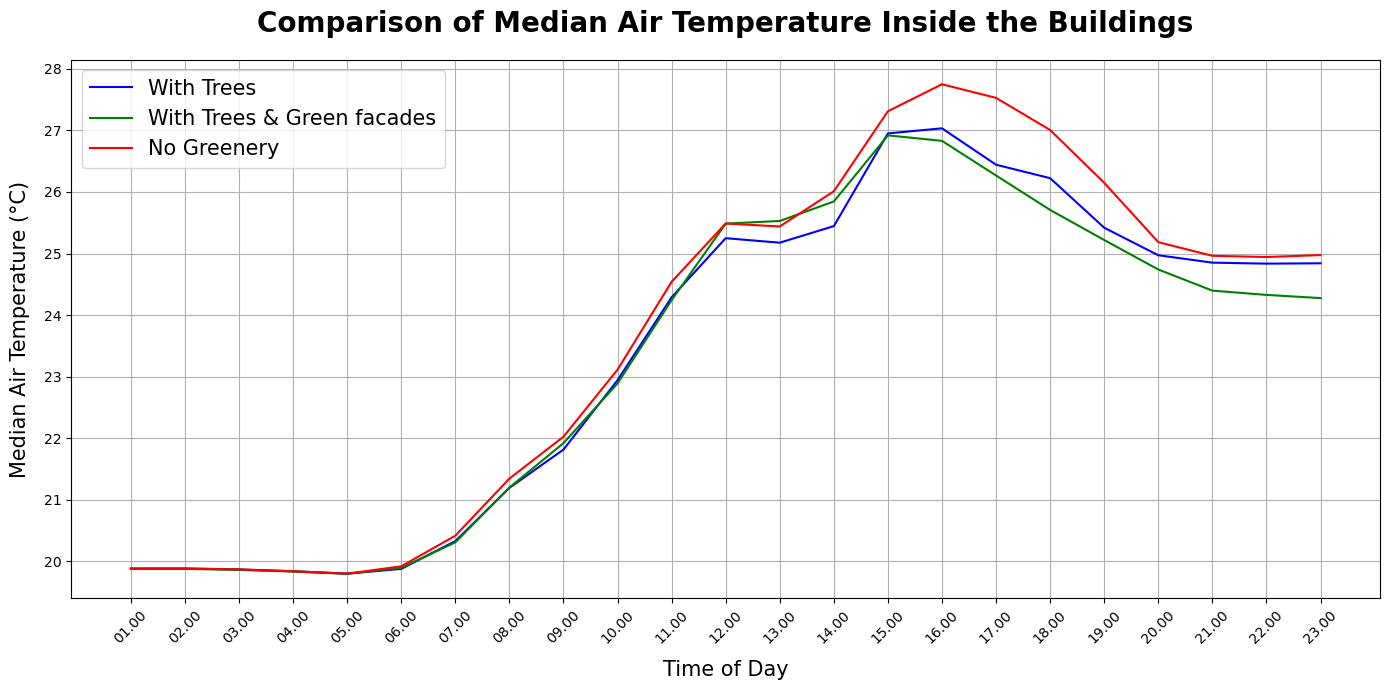

In [3]:
# Load the datasets
with_tree_df = pd.read_excel("C:/Users/golna.GOLNAZ/Desktop/Result/building temperature/Summer/with tree.xlsx")
full_green_df = pd.read_excel("C:/Users/golna.GOLNAZ/Desktop/Result/building temperature/Summer/full green.xlsx")
no_greenery_df = pd.read_excel("C:/Users/golna.GOLNAZ/Desktop/Result/building temperature/Summer/no greenery.xlsx")

# Calculating median temperature at each time point across all buildings for each scenario
with_tree_median_temp_time = with_tree_df.drop(['Date', 'Time'], axis=1).median(axis=1)
full_green_median_temp_time = full_green_df.drop(['Date', 'Time'], axis=1).median(axis=1)
no_greenery_median_temp_time = no_greenery_df.drop(['Date', 'Time'], axis=1).median(axis=1)

# Extracting time from one of the datasets (assuming all have the same time points)
time_points = with_tree_df['Time'].str.slice(0, 5)  # Simplified time format for readability

plt.figure(figsize=(14, 7))
plt.plot(time_points, with_tree_median_temp_time, label='With Trees', color='blue')
plt.plot(time_points, full_green_median_temp_time, label='With Trees & Green facades', color='green')
plt.plot(time_points, no_greenery_median_temp_time, label='No Greenery', color='red')

plt.title('Comparison of Median Air Temperature Inside the Buildings', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Time of Day', fontsize=15, labelpad=10)
plt.ylabel('Median Air Temperature (°C)', fontsize=15, labelpad=10)
plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.grid(True)
plt.tight_layout()

plt.savefig('C:/Users/golna.GOLNAZ/Desktop/Result/building temperature/Median_Air_Temperature_Comparison.png', dpi=600)
plt.show()

In [4]:
# Calculate absolute differences between each pair of scenarios at each time point

In [5]:
diff_with_tree_full_green = abs(with_tree_median_temp_time - full_green_median_temp_time)
diff_with_tree_no_greenery = abs(with_tree_median_temp_time - no_greenery_median_temp_time)
diff_full_green_no_greenery = abs(full_green_median_temp_time - no_greenery_median_temp_time)

# Sum these differences to get a total difference value for each time point
total_diff = diff_with_tree_full_green + diff_with_tree_no_greenery + diff_full_green_no_greenery

# Find the time point with the maximum total difference
max_diff_index = total_diff.idxmax()  # Index of the maximum difference
max_diff_time = time_points.iloc[max_diff_index]  # Time corresponding to the maximum difference

print(f"Maximum difference between the scenarios occurs at: {max_diff_time}")

Maximum difference between the scenarios occurs at: 18.00
